# Section 08 - Performance Analysis - F - higher lift-to-drag ratio

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

In [24]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.7 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 4000.0 km
# apoapsis = 550,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(4000.0, 550.0E3, 10.0E3)

In [25]:
# Set path to atmfiles with randomly perturbed atmosphere files.
atmfiles = ['../../../atmdata/Uranus/perturbed/G-01.txt',
            '../../../atmdata/Uranus/perturbed/G-02.txt',
            '../../../atmdata/Uranus/perturbed/G-03.txt',
            '../../../atmdata/Uranus/perturbed/G-04.txt',
            '../../../atmdata/Uranus/perturbed/G-05.txt']

In [26]:
vehicle.setupMonteCarloSimulation(1201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -11.70, 0.10, 0.30, 0.013, 0.5, 0.1, 2400.0)

## Small run N = 200

In [27]:
vehicle.runMonteCarlo2(200, '../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF')

RUN #: 1, SAMPLE #: 79, EFPA: -11.67, SIGMA: 0.75, LD: 0.30, APO : 511456.39
RUN #: 2, SAMPLE #: 154, EFPA: -11.83, SIGMA: 0.17, LD: 0.30, APO : 509239.28
RUN #: 3, SAMPLE #: 4, EFPA: -11.68, SIGMA: -0.47, LD: 0.30, APO : 511362.47
RUN #: 4, SAMPLE #: 137, EFPA: -11.77, SIGMA: 1.76, LD: 0.27, APO : 561003.54
RUN #: 5, SAMPLE #: 20, EFPA: -11.57, SIGMA: 1.76, LD: 0.33, APO : 564622.46
RUN #: 6, SAMPLE #: 151, EFPA: -11.75, SIGMA: -0.91, LD: 0.31, APO : 512058.49
RUN #: 7, SAMPLE #: 22, EFPA: -11.65, SIGMA: -0.27, LD: 0.33, APO : 557710.75
RUN #: 8, SAMPLE #: 108, EFPA: -11.89, SIGMA: 0.02, LD: 0.29, APO : 506407.13
RUN #: 9, SAMPLE #: 28, EFPA: -11.63, SIGMA: -0.09, LD: 0.31, APO : 572561.24
RUN #: 10, SAMPLE #: 35, EFPA: -11.69, SIGMA: -0.07, LD: 0.29, APO : 548434.08
RUN #: 11, SAMPLE #: 116, EFPA: -11.69, SIGMA: 0.47, LD: 0.29, APO : 507496.80
RUN #: 12, SAMPLE #: 47, EFPA: -11.55, SIGMA: 0.71, LD: 0.29, APO : 477703.78
RUN #: 13, SAMPLE #: 161, EFPA: -11.75, SIGMA: -1.04, LD: 0.30, 

RUN #: 105, SAMPLE #: 82, EFPA: -11.64, SIGMA: -0.34, LD: 0.31, APO : 530694.49
RUN #: 106, SAMPLE #: 183, EFPA: -11.65, SIGMA: -0.91, LD: 0.31, APO : 536651.86
RUN #: 107, SAMPLE #: 105, EFPA: -11.70, SIGMA: 0.24, LD: 0.30, APO : 492368.06
RUN #: 108, SAMPLE #: 29, EFPA: -11.70, SIGMA: 0.79, LD: 0.28, APO : 528085.67
RUN #: 109, SAMPLE #: 79, EFPA: -11.54, SIGMA: 0.47, LD: 0.32, APO : 515337.81
RUN #: 110, SAMPLE #: 110, EFPA: -11.71, SIGMA: -0.68, LD: 0.32, APO : 545941.13
RUN #: 111, SAMPLE #: 145, EFPA: -11.76, SIGMA: 1.35, LD: 0.29, APO : 504970.95
RUN #: 112, SAMPLE #: 35, EFPA: -11.87, SIGMA: 1.06, LD: 0.30, APO : 518844.64
RUN #: 113, SAMPLE #: 169, EFPA: -11.46, SIGMA: -1.01, LD: 0.31, APO : 513162.41
RUN #: 114, SAMPLE #: 117, EFPA: -11.80, SIGMA: -0.84, LD: 0.31, APO : 557044.26
RUN #: 115, SAMPLE #: 67, EFPA: -11.65, SIGMA: 1.09, LD: 0.28, APO : 519154.60
RUN #: 116, SAMPLE #: 101, EFPA: -11.73, SIGMA: 1.64, LD: 0.31, APO : 569844.13
RUN #: 117, SAMPLE #: 185, EFPA: -11.67,

In [3]:
p1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/q_stag_max_arr.txt')
h1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/heatload_max_arr.txt')
u1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBXF/apoapsis_raise_DV_arr.txt')

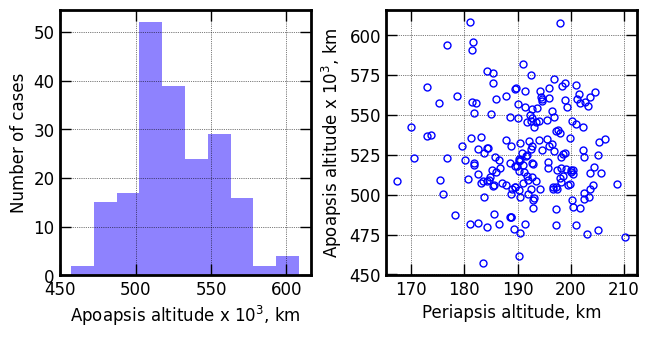

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

## Remove cases which did not capture

In [5]:
del_index1 = np.where(x1 < 0)
del_index1

(array([], dtype=int64),)

No cases failed to capture. Nothing to delete.

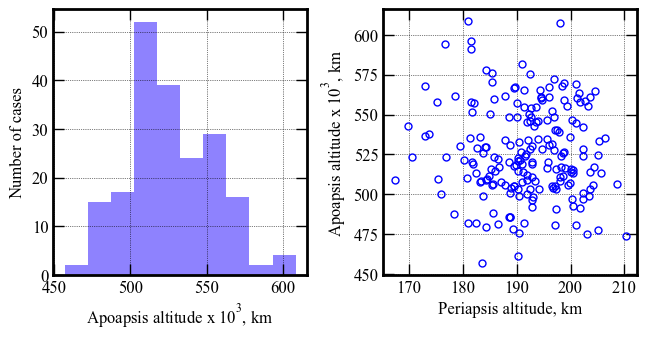

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

In [33]:
print("--------------------------------------------------------------------------------------------------------")

print("Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max")
print("--------------------------------------------------------------------------------------------------------")
print("Apoapsis altitude, km  |    " + str(round(np.min(x1))) + "          " +  str(round(np.percentile(x1, 0.13))) +\
                                                                "         " +  str(round(np.average(x1))) +
                                                                "          " +  str(round(np.percentile(x1, 99.87)))+\
                                                                "          " +  str(round(np.max(x1))))
print("Periapsis altitude, km |       " + str(round(np.min(p1))) + "             " +  str(round(np.percentile(p1, 0.13))) +\
                                                                "            " +  str(round(np.average(p1))) +
                                                                "             " +  str(round(np.percentile(p1, 99.87)))+\
                                                                "             " +  str(round(np.max(p1))))
print("Peak deceleration, g   |       " + str(round(np.min(y1), 2)) + "           " +  str(round(np.percentile(y1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(y1), 2)) +
                                                                "            " +  str(round(np.percentile(y1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(y1), 2)))

print("Peak heat rate, W/cm2  |       " + str(round(np.min(z1))) + "           " +  str(round(np.percentile(z1, 0.13))) +\
                                                                "           " +  str(round(np.average(z1))) +
                                                                "            " +  str(round(np.percentile(z1, 99.87)))+\
                                                                "            " +  str(round(np.max(z1))))

print("Peak heat load, kJ/cm2 |        " + str(round(np.min(h1))) + "            " +  str(round(np.percentile(h1, 0.13))) +\
                                                                "            " +  str(round(np.average(h1))) +
                                                                "             " +  str(round(np.percentile(h1, 99.87)))+\
                                                                "             " +  str(round(np.max(h1))))
print("Periapsis raise dV, m/s|      " + str(round(np.min(u1), 2)) + "          " +  str(round(np.percentile(u1, 0.13), 2)) +\
                                                                "          " +  str(round(np.average(u1), 2)) +
                                                                "           " +  str(round(np.percentile(u1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(u1), 2)))

print("Apoapsis corr. dV, m/s |     " + str(round(np.min(v1), 2)) + "         " +  str(round(np.percentile(v1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(v1), 2)) +
                                                                "          " +  str(round(np.percentile(v1, 99.87), 2))+\
                                                                "          " +  str(round(np.max(v1), 2)))

print("--------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------
Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max
--------------------------------------------------------------------------------------------------------
Apoapsis altitude, km  |    456946          458077         526440          608243          608471
Periapsis altitude, km |       167             168            192             210             210
Peak deceleration, g   |       6.88           6.92           8.02            9.87           9.97
Peak heat rate, W/cm2  |       1586           1597           1746            1915            1927
Peak heat load, kJ/cm2 |        206            207            221             232             232
Periapsis raise dV, m/s|      57.68          57.73          65.81           74.32           74.52
Apoapsis corr. dV, m/s |     -43.64         -43.49           21.35          89.03          90.32
----------

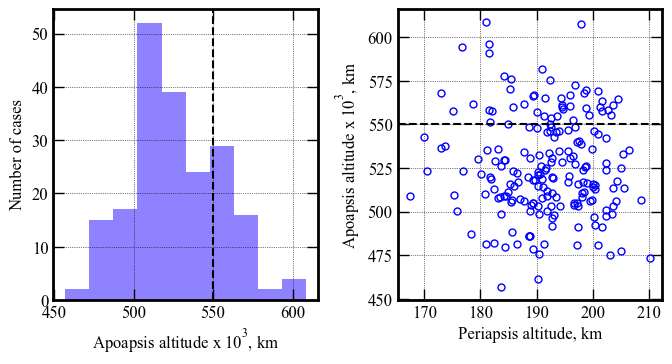

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].axvline(x=550.0, linewidth=1.5, color='k', linestyle='dashed')
axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')
axes[1].axhline(y=550.0, linewidth=1.5, color='k', linestyle='dashed')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis-XF.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis-XF.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis-XF.eps', dpi=300,bbox_inches='tight')


plt.show()

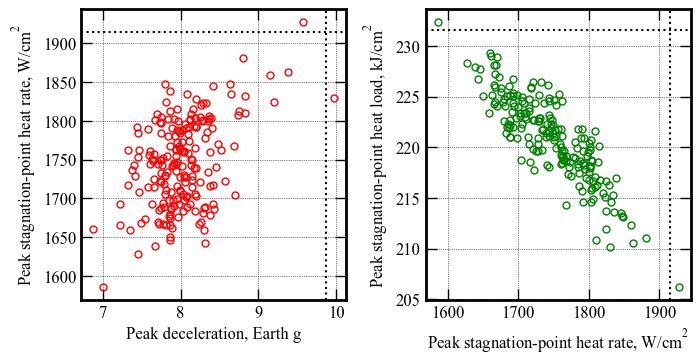

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].axhline(y=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].axvline(x=np.percentile(y1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=12)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].axhline(y=np.percentile(h1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].axvline(x=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load-XF.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load-XF.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load-XF.eps', dpi=300,bbox_inches='tight')


plt.show()

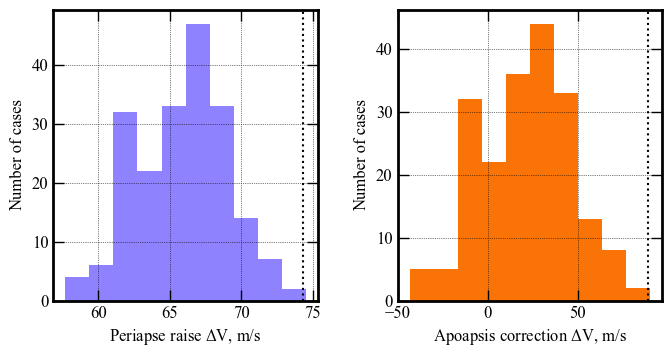

In [37]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)


axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].axvline(x=np.percentile(u1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].hist(v1, bins=10, color='xkcd:orange')
axes[1].axvline(x=np.percentile(v1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=12)
axes[1].set_ylabel('Number of cases', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers-XF.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers-XF.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers-XF.eps', dpi=300,bbox_inches='tight')


plt.show()

In [7]:
def percent_between(a, lower, upper, closed_left=True, closed_right=True):
    """
    Finds the percentage of values between a range for a numpy array

    Parameters
    ----------
    a: np.ndarray
      numpy array to calculate percentage
    lower: int, float
      lower bound
    upper: int, float
      upper bound
    closed_left:
      closed left bound ( > vs >= )
    closed_right:
      closed right bound ( < vs <= )
    """
    l = np.greater if not closed_left else np.greater_equal
    r = np.less if not closed_right else np.less_equal

    c = l(a, lower) & r(a, upper)
    return np.count_nonzero(c) / float(a.size)

In [8]:
percent_between(x1, 500e3, 600e3)

0.84

In [9]:
percent_between(x1, 450e3, 650e3)

1.0

In [41]:
percent_between(x1, 350e3, 750e3)

1.0